In [1]:
import os
from xml.etree import ElementTree
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imshow, imread
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn import ensemble
from sklearn.metrics import accuracy_score
import cv2
from sklearn.multiclass import OneVsRestClassifier

# Creating the database

In [2]:
annotations_path = "F:\Projects\MEDH_projects\DatabasesConstructor\VOCdevkit\VOC2007\Annotations"
images_path = "F:\Projects\MEDH_projects\DatabasesConstructor\VOCdevkit\VOC2007\JPEGImages"

In [3]:
tags = []
images = []

In [4]:
classes = ["person", "bird", "cat", "cow", "dog", "horse", "sheep",
           "aeroplane", "bicycle", "boat", "bus", "car", "motorbike", "train",
           "bottle", "chair", "dining", "table", "potted", "plant", "sofa", "tv/monitor"
]

In [6]:
%%time

dataset_dict = {}

for file in os.listdir(annotations_path):
    file_path = os.path.join(annotations_path, file)
    print(file_path)
    dom = ElementTree.parse(file_path)
    objects = dom.findall("object")
    for object in objects:
        if len(objects) == 1:
            object_label = object.find("name").text
        elif object.find("truncated").text == "1":
            continue
        else:
            object_label = object.find("name").text
            break
    dataset_dict[file] = object_label

F:\Projects\MEDH_projects\DatabasesConstructor\VOCdevkit\VOC2007\Annotations\000001.xml


NameError: name 'object_label' is not defined

In [100]:
dataset_dict

{'2007_000027.xml': {'person'},
 '2007_000032.xml': {'aeroplane', 'person'},
 '2007_000033.xml': {'aeroplane'},
 '2007_000039.xml': {'tvmonitor'},
 '2007_000042.xml': {'train'},
 '2007_000061.xml': {'boat'},
 '2007_000063.xml': {'chair', 'dog'},
 '2007_000068.xml': {'bird'},
 '2007_000121.xml': {'tvmonitor'},
 '2007_000123.xml': {'train'},
 '2007_000129.xml': {'bicycle', 'person'},
 '2007_000170.xml': {'bottle', 'person'},
 '2007_000175.xml': {'sheep'},
 '2007_000187.xml': {'tvmonitor'},
 '2007_000241.xml': {'boat'},
 '2007_000243.xml': {'aeroplane'},
 '2007_000250.xml': {'bottle', 'diningtable'},
 '2007_000256.xml': {'aeroplane'},
 '2007_000272.xml': {'person'},
 '2007_000323.xml': {'person'},
 '2007_000332.xml': {'horse'},
 '2007_000333.xml': {'train'},
 '2007_000346.xml': {'bottle', 'person'},
 '2007_000363.xml': {'bird'},
 '2007_000364.xml': {'motorbike', 'person'},
 '2007_000392.xml': {'horse', 'person'},
 '2007_000423.xml': {'person'},
 '2007_000452.xml': {'chair', 'sofa'},
 '200

In [101]:
for _, item in dataset_dict.items():
    tags.append(list(item))

In [102]:
for key in dataset_dict:
    file_path = os.path.join(images_path, key.replace('.xml', '.jpg'))
    image = imread(file_path)
    images.append(image)

In [103]:
images

[array([[[208, 220, 208],
         [206, 218, 206],
         [203, 215, 205],
         ...,
         [ 82,  58,  72],
         [ 65,  43,  56],
         [184, 164, 175]],
 
        [[210, 222, 210],
         [209, 221, 209],
         [208, 220, 210],
         ...,
         [ 93,  68,  72],
         [ 97,  77,  79],
         [192, 173, 175]],
 
        [[210, 220, 209],
         [212, 222, 211],
         [211, 221, 210],
         ...,
         [133, 112,  91],
         [136, 119, 101],
         [205, 189, 173]],
 
        ...,
 
        [[156,  97,  89],
         [152,  95,  86],
         [144,  87,  80],
         ...,
         [ 47,  32,  51],
         [ 64,  53,  69],
         [240, 232, 245]],
 
        [[155,  97,  86],
         [153,  96,  87],
         [148,  91,  84],
         ...,
         [ 52,  37,  56],
         [ 66,  55,  71],
         [238, 230, 243]],
 
        [[154,  96,  85],
         [155,  98,  87],
         [149,  92,  85],
         ...,
         [ 65,  50,  69],
  

# Extracting the features

In [9]:
def hsv_image(image):
    test_image_hsv = matplotlib.colors.rgb_to_hsv(image[...,:3])
    lu=test_image_hsv[...,1].flatten()
    return lu

In [99]:
%%time

images_hsv = []
for image in images:
    images_hsv.append(hsv_image(image))

NameError: name 'hsv_image' is not defined

In [142]:
def color_hist_hsv_desc(image):

    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hue = cv2.calcHist(image, [0], mask=None, histSize=[256], ranges=[0, 256])
    saturation = cv2.calcHist(image, [1], mask=None, histSize=[256], ranges=[0, 256])
    value = cv2.calcHist(image, [2], mask=None, histSize=[256], ranges=[0, 256])

    hist = np.ravel(hue).tolist() + np.ravel(saturation).tolist() + np.ravel(value).tolist()
    return hist
    # return hues, saturations, values

In [143]:
image = images[0]

In [145]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [151]:
hue = cv2.calcHist(image, [0], mask=None, histSize=[32], ranges=[0, 256])

In [152]:
hue

array([[  1.],
       [ 80.],
       [113.],
       [ 61.],
       [ 48.],
       [ 48.],
       [ 64.],
       [ 38.],
       [ 32.],
       [ 78.],
       [ 77.],
       [ 34.],
       [ 56.],
       [ 82.],
       [ 77.],
       [ 59.],
       [ 59.],
       [ 90.],
       [ 52.],
       [ 17.],
       [ 16.],
       [ 11.],
       [ 17.],
       [  7.],
       [  8.],
       [ 12.],
       [ 24.],
       [ 18.],
       [ 15.],
       [ 72.],
       [ 57.],
       [ 35.]], dtype=float32)

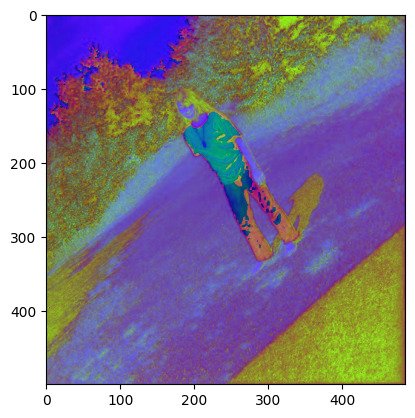

In [146]:
plt.imshow(image)

In [134]:
%%time

images_hsv = []
for image in images:
    hist = np.array(color_hist_hsv_desc(image))
    images_hsv.append(hist)

CPU times: total: 4.62 s
Wall time: 5.37 s


In [141]:
images_hsv[2156]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  3.,  2., 16.,  5., 14.,
       10.,  3., 12., 11.,  4., 15., 14.,  7.,  9.,  5.,  6.,  5.,  4.,
       13.,  4., 14., 11., 19., 13., 12., 13., 18., 30., 16., 12., 16.,
       12.,  9., 11.,  4.,  2.,  3.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  2.,  0.,  0.,  6.,  5., 15., 18.,  1., 24.,
       10., 11.,  4., 31.,  5., 44.,  0., 43., 21.,  9., 14.,  4.,  8.,
       11.,  7.,  9., 18.,  5.,  9.,  3.,  1.,  2.,  1.,  4.,  1.,  2.,
        6.,  0.,  3.,  4.,  0.,  2.,  1.,  3.,  5.,  4.,  0.,  4.,  0.,
        0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,
        0.,  4.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  4.,
        1.,  1.,  1.,  0.,  3.,  0.,  5.,  7.,  2.,  1.,  4.,  4., 10.,
        5.,  1.,  1.,  4.,  6.,  8.,  3.,  1.,  5.,  0.,  4.,  5

<function matplotlib.pyplot.show(close=None, block=None)>

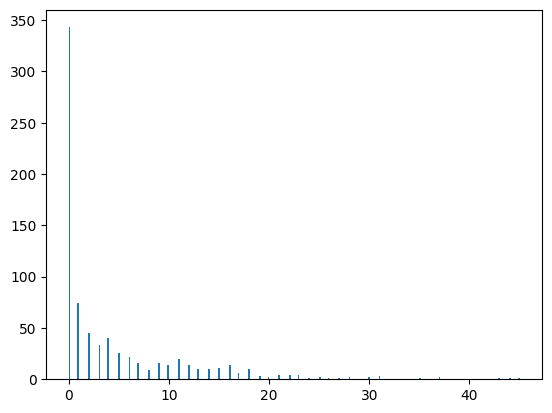

In [140]:
plt.hist(images_hsv[2156], 256)
plt.show

In [138]:
len(images_hsv[235])

768

#### Data splitting

In [77]:
train_ds, test_ds, train_tags, test_tags = train_test_split(images_hsv, tags, test_size=0.2, shuffle=True)

In [78]:
train_tags = MultiLabelBinarizer().fit_transform(train_tags)
test_tags = MultiLabelBinarizer().fit_transform(test_tags)

In [79]:
train_tags

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

# Dimensionality Reduction

In [24]:
steps = [
    ("LDA", OneVsRestClassifier(estimator=LDA())),
    ("m", OneVsRestClassifier(GaussianNB()))
]

In [25]:
%%time

model = Pipeline(steps=steps)
model.fit(train_ds, train_tags)

TypeError: All intermediate steps should be transformers and implement fit and transform or be the string 'passthrough' 'OneVsRestClassifier(estimator=LinearDiscriminantAnalysis())' (type <class 'sklearn.multiclass.OneVsRestClassifier'>) doesn't

In [27]:
model = LDA()
model.fit(train_ds, train_tags)

ValueError: y should be a 1d array, got an array of shape (4076, 20) instead.

In [32]:
model = BernoulliNB()
model.fit(train_ds, train_tags)

ValueError: y should be a 1d array, got an array of shape (4076, 20) instead.

In [ ]:
model = GaussianNB()
model.fit(train_ds, train_tags)

In [80]:
%%time

model = OneVsRestClassifier(BernoulliNB())
model.fit(train_ds, train_tags)

CPU times: total: 31.2 ms
Wall time: 143 ms


OneVsRestClassifier(estimator=BernoulliNB())

In [81]:
predicts = model.predict(test_ds)

accuracy = accuracy_score(y_true = test_tags, y_pred = predicts)
print('Accuracy = ',accuracy)

Accuracy =  0.14215686274509803
